# Climate Data – A hands-on python course
Author: Pedro Herrera Lormendez (pedrolormendez@gmail.com)

## Computing climatologies and anomalies
Climatology,refers to the study and analysis of the climate, typically over extended periods. "A climatology" in a data context, usually means a dataset or analysis representing the average or typical state of the climate system over a specified period. This period is often long enough to smooth out year-to-year variations, leaving only the longer-term, more stable patterns.

* Climatologies are commonly collected and computed over a 30-year period, as recommended by the World Meteorological Organization (WMO). 
* A climatology often involves computing statistical averages of a climate variable over the chose period.
Climatologies are used as a baseline to study current climate conditions, to identify climate anomalies and trends, and in climate modelling and forecasting.
* Climatologies are critical in understanding historical climate patterns, which are essential for predicting future climatic changes and for various applications in agriculture, environmental planning, and disaster managment.

Visualisations:
* [Global temperature distribution](https://climvis.org/content/anim/ltm/globe/t2m_globe_1991-2020_ltm/t2m_globe_1991-2020_ltm.html)
* [Global precipitation rate](https://climvis.org/content/anim/ltm/globe/tp_globe_1991-2020_ltm/tp_globe_1991-2020_ltm.html)
* [P - E](https://climvis.org/content/anim/ltm/globe/pme_globe_1991-2020_ltm/pme_globe_1991-2020_ltm.html)
* [More animations](https://climvis.org/animations.html)

### Computing the seasonal mean climatology of temperature over Europe
We will use two datasets from the ERA5 reanalysis of monthly mean temperature and precipitation over Europe. 
* [t2m file](https://drive.google.com/file/d/1-JZirUHXP7sDGIUoFG_h8znRn2rfKT8m/view?usp=sharing)
* [rainfall file](https://drive.google.com/file/d/1ErVv5A0DNhDQKvmVYbUNUAIGysV-p6sd/view?usp=sharing)

In [4]:
# importing the neccessary modules
import sys
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
#import cartopy.crs as ccrs
# Assuming your Jupyter notebook is in the 'notebooks' directory
sys.path.append(os.path.abspath('../help_code'))
import tools

In [8]:
# Reading the file
file_path = '../data/t2m_monthly_era5.nc'
DS = xr.open_dataset(file_path)
DS = tools.convert_and_sort_coords(DS)
print(f"The file has the following information {DS}")

The file has the following information <xarray.Dataset>
Dimensions:    (latitude: 201, longitude: 321, time: 996)
Coordinates:
  * longitude  (longitude) float32 -40.0 -39.75 -39.5 -39.25 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 30.0 30.25 30.5 30.75 ... 79.5 79.75 80.0
  * time       (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2024-01-11 20:22:15 GMT by grib_to_netcdf-2.25.1: /opt/ecmw...


In [11]:
# Reading the temperature variable and converting to ºC
t2m = DS['t2m'] - 273.15
print(t2m.time)

<xarray.DataArray 'time' (time: 996)>
array(['1940-01-01T00:00:00.000000000', '1940-02-01T00:00:00.000000000',
       '1940-03-01T00:00:00.000000000', ..., '2022-10-01T00:00:00.000000000',
       '2022-11-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1940-01-01 1940-02-01 ... 2022-12-01
Attributes:
    long_name:  time


The most recent climate period in use corresponds to the 30-year period of 1991 - 2020. Let's compute the climatological seasonal mean (DJF, MAM, JJA, SON) value of tempeature for this period. Make sure to slice the data from the 1991-03 to 2021-02 period. We want to avoid computing a seasonal anomaly that is influenced by a short 1991 winter season (Jan and Feb) and by a too short 2020 winter season (only December data). Therefore, we will slice our data for March-1991 to February-2021

In [13]:
# First let's extract/slice the data for the climatological period 1991-03 - 2021-02
t2m_sliced = t2m.sel(time = slice('1991-03', '2021-02'))
print(t2m_sliced.time)
print(f"The t2m_slice times start in {t2m_sliced.time[0].values} and end in {t2m_sliced.time[-1].values}")

<xarray.DataArray 'time' (time: 360)>
array(['1991-03-01T00:00:00.000000000', '1991-04-01T00:00:00.000000000',
       '1991-05-01T00:00:00.000000000', ..., '2020-12-01T00:00:00.000000000',
       '2021-01-01T00:00:00.000000000', '2021-02-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1991-03-01 1991-04-01 ... 2021-02-01
Attributes:
    long_name:  time
The t2m_slice times start in 1991-03-01T00:00:00.000000000 and end in 2021-02-01T00:00:00.000000000


In order to compute the mean value of temperature per season we will employ the [DataArray.groupby()](https://docs.xarray.dev/en/stable/generated/xarray.DataArray.groupby.html) function. The 'groupby' function in Xarray is a powerful tool for organizing and summarising data in multi-dimensional arrays. It allows to group a datasets based on time (like months, years, or seasons), geographical locations, or any other dimension or variable in the dataset. After grouping the data, you can apply various functions to each group (like sum, mean, maximum, minimum) which help in summarising the data in each group.

In [21]:
# Use the DataArray.groupby('time.season').mean()
t2m_seasonal_mean = t2m_sliced.groupby('time.season').mean()
# print(t2m_seasonal_mean.dims)
# print(t2m_seasonal_mean)

### Using matplotlib to visualise our data

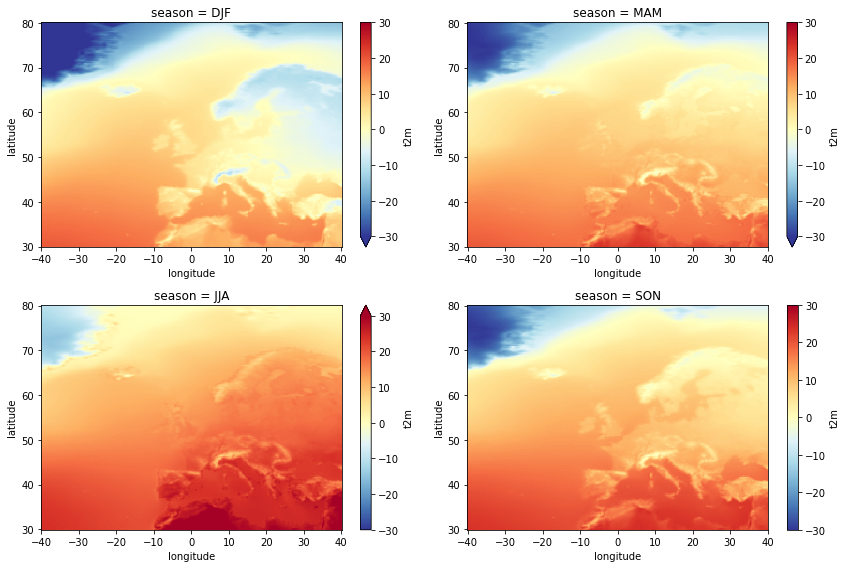

In [29]:
# Set up the matplotlib figure and axes. The 'figsize' can be adjusted as needed.
figs, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
# Winter (DJF)
t2m_seasonal_mean.sel(season='DJF').plot(vmin=-30, vmax=30, cmap='RdYlBu_r', ax = axs[0, 0]) #axs[row, column]
# Spring (MAM)
t2m_seasonal_mean.sel(season='MAM').plot(vmin=-30, vmax=30, cmap='RdYlBu_r', ax = axs[0, 1])
# Summer (JJA)
t2m_seasonal_mean.sel(season='JJA').plot(vmin=-30, vmax=30, cmap='RdYlBu_r',  ax = axs[1, 0])
# Autumn (SON)
t2m_seasonal_mean.sel(season='SON').plot(vmin=-30, vmax=30, cmap='RdYlBu_r', ax = axs[1, 1])
plt.tight_layout()
# plt.savefig()

#### Practice time 💻
<div style="background-color:lightgreen; padding:10px">
    Compute the European mean seasonal temperature .
    <ul>
        <li>Crop to the area of -10 to 35ºE and 35 to 70ºN use 
            DataArray.sel(lat=slice(south, north), lon=slice(west, east))</li>
        <li>Compute the spatial mean value use DataArray.mean(dim=('lat', 'lon'))</li>
        <li>Using matplotlib. Plot a time series of the seasonal mean value of EU temperature</li>
        <li>Add appropiate axis labels and title</li>
    </ul>
</div>

In [ ]:
# plt.plot(x,y)

In [31]:
t2m_seasonal_mean.season

<xarray.DataArray 'season' (season: 4)>
array(['DJF', 'JJA', 'MAM', 'SON'], dtype=object)
Coordinates:
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'

In [32]:
# Re-aranging "season" dimension to DJF, MAM, JJA, SON
season_order = ['DJF', 'MAM', 'JJA', 'SON']
t2m_seasonal_mean = t2m_seasonal_mean.reindex(season=season_order)
t2m_seasonal_mean.season

<xarray.DataArray 'season' (season: 4)>
array(['DJF', 'MAM', 'JJA', 'SON'], dtype='<U3')
Coordinates:
  * season   (season) <U3 'DJF' 'MAM' 'JJA' 'SON'

In [43]:
t2m_seasonal_mean_eu.mean(dim='longitude')

<xarray.DataArray 't2m' (season: 4, latitude: 141)>
array([[12.58908   , 12.714915  , 13.046798  , 13.172741  , 13.098562  ,
        12.794252  , 12.451394  , 12.101433  , 11.521093  , 11.058375  ,
        10.873464  , 10.527744  , 10.332468  , 10.303949  , 10.153992  ,
         9.924303  ,  9.75417   ,  9.496361  ,  9.255239  ,  9.066363  ,
         8.748724  ,  8.325029  ,  7.9402556 ,  7.7453237 ,  7.730949  ,
         7.6715345 ,  7.3118625 ,  6.8329773 ,  6.9039683 ,  6.788454  ,
         6.3090253 ,  5.907302  ,  6.0031595 ,  6.3456793 ,  6.471183  ,
         6.28699   ,  5.855056  ,  5.348065  ,  4.9827776 ,  4.688764  ,
         4.423592  ,  4.0651484 ,  3.7189162 ,  3.436402  ,  3.0132253 ,
         2.3652217 ,  1.8337401 ,  1.6784126 ,  1.6743292 ,  1.8517835 ,
         2.0214918 ,  2.1214828 ,  2.169519  ,  2.1230657 ,  1.9557772 ,
         1.9115427 ,  1.8710196 ,  1.8461766 ,  1.8746245 ,  1.9611666 ,
         2.015976  ,  1.9552432 ,  1.8167905 ,  1.7523499 ,  1.8152001 ,
         1.9247248 ,  1.9125712 ,  1.7685571 ,  1.6482142 ,  1.5982789 ,
         1.5592476 ,  1.5038632 ,  1.4429581 ,  1.4036648 ,  1.4280359 ,
         1.462574  ,  1.4566458 ,  1.5236079 ,  1.6794441 ,  1.8455733 ,
         1.9346142 ,  1.9636898 ,  1.9298967 ,  1.9213089 ,  1.9009318 ,
         1.7776856 ,  1.6353667 ,  1.5158187 ,  1.4488981 ,  1.4744998 ,
         1.5500501 ,  1.6485074 ,  1.6112764 ,  1.4107642 ,  1.2485787 ,
         1.0719994 ,  0.8503096 ,  0.6055087 ,  0.37598482,  0.17952058,
...
        11.216361  , 10.709261  , 10.546225  , 10.442785  , 10.54106   ,
        10.690691  , 10.747073  , 10.705395  , 10.6063385 , 10.390915  ,
        10.281009  , 10.204967  , 10.138574  , 10.11446   , 10.15427   ,
        10.184642  , 10.124066  ,  9.991866  ,  9.912117  ,  9.929104  ,
        10.022421  , 10.010931  ,  9.862819  ,  9.732025  ,  9.667304  ,
         9.610085  ,  9.533916  ,  9.455345  ,  9.388107  ,  9.405449  ,
         9.431429  ,  9.406664  ,  9.441311  ,  9.553678  ,  9.666759  ,
         9.688415  ,  9.629216  ,  9.511593  ,  9.439464  ,  9.376605  ,
         9.225703  ,  9.060278  ,  8.921326  ,  8.828829  ,  8.81752   ,
         8.860928  ,  8.930105  ,  8.905829  ,  8.718689  ,  8.569499  ,
         8.401965  ,  8.195662  ,  7.982105  ,  7.8040123 ,  7.6806135 ,
         7.4456315 ,  7.162326  ,  6.9446583 ,  6.756125  ,  6.61736   ,
         6.419246  ,  6.119639  ,  5.848182  ,  5.720356  ,  5.548975  ,
         5.6231413 ,  5.6956377 ,  5.742936  ,  5.806861  ,  5.7815056 ,
         5.6407466 ,  5.4785023 ,  5.399027  ,  5.3525844 ,  5.3219585 ,
         5.20388   ,  5.0706344 ,  4.9243536 ,  4.717016  ,  4.5090804 ,
         4.387574  ,  4.2373343 ,  4.11962   ,  4.0003858 ,  3.8610797 ,
         3.8688698 ,  3.7866592 ,  3.7141163 ,  3.7342634 ,  3.7369761 ,
         3.6819375 ,  3.8045897 ,  3.7878811 ,  3.8416405 ,  3.9887807 ,
         4.1544356 ]], dtype=float32)
Coordinates:
  * season    (season) <U3 'DJF' 'MAM' 'JJA' 'SON'
  * latitude  (latitude) float32 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0

Text(0.5, 1.0, 'European seasonal mean temperature (Climatology of 1991-2020) \n ERA5 Reanalysis')

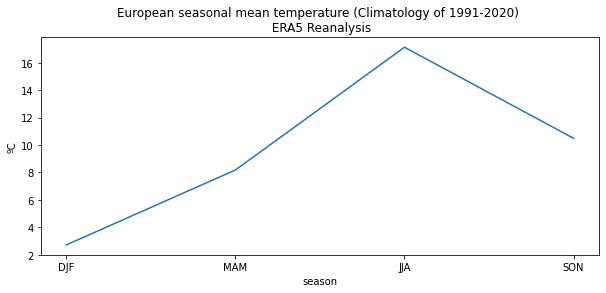

In [44]:
# Your code goes here
# Crop the data to the European domain -10 to 35ºE and 35 to 70ºN
t2m_seasonal_mean_eu = t2m_seasonal_mean.sel(latitude = slice(35,70), longitude=slice(-10,35))
# Compute the seasonal spatial mean value
t2m_seasonal_spatial_mean = t2m_seasonal_mean_eu.mean(dim=('latitude', 'longitude'))
# Create a figure using matplotlib plt.figure(figsize(x,y))
plt.figure(figsize=(10,4))
# Use plt.plot(x,y) to plot your data
plt.plot(t2m_seasonal_spatial_mean.season, t2m_seasonal_spatial_mean.values)
# Mean by latitude
# plt.plot(t2m_seasonal_mean_eu.mean(dim='longitude'))
# Add labels to the x and y axis 
plt.xlabel('season')
plt.ylabel('ºC')
# Add an appropiate title
plt.title('European seasonal mean temperature (Climatology of 1991-2020) \n ERA5 Reanalysis')
# plt.savefig('seasonal_mean_t2m_EU.png', dpi=300, bbox_inches='tight')
# plt.show()

### Computing the yearly temperature anomaly
A climatological anomaly of temperature, often referred to simply as temperature anomaly, is a measure of how the temperature of a specific place and time deviated from some reference temperature (usually the climatological value over the 30-year baseline period).

$Temperature Anomaly = \text{Observed Temperature} - \text{Baseline Temperature}
$

In [46]:
# Computing the average temperature for the 1961-1990 climatological period
t2m_climate_yearly = t2m.sel(time=slice('1961', '1990')).groupby('time.year').mean()
t2m_climate_yearly.year

<xarray.DataArray 'year' (year: 30)>
array([1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990])
Coordinates:
  * year     (year) int64 1961 1962 1963 1964 1965 ... 1986 1987 1988 1989 1990

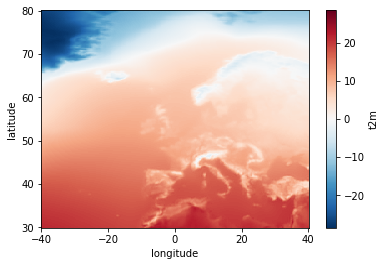

In [47]:
# We compute the mean temperature along the time (in this case year) dimension
t2m_mean_climate = t2m_climate_yearly.mean(dim='year')
# This is the mean temperature over every grid point for the 1961-1990 climate period
t2m_mean_climate.plot()

In [57]:
# We need to compute the yearly mean data for the whole 1940 - 2022 period
# t2m_yearly_mean = OBSERVED TEMPERATURE - CLIMATE
t2m_yearly_mean = t2m.groupby('time.year').mean()
# t2m_yearly_mean.year

In [53]:
# Computing the yearly temperature anomaly = yearly_mean - climatology_mean
t2m_yearly_anomaly = t2m_yearly_mean - t2m_mean_climate
t2m_yearly_anomaly.dims

('year', 'latitude', 'longitude')

#### Practice time 💻
<div style="background-color:lightgreen; padding:10px">
    Compute the spatial mean temperature anomaly for the 1940 - 2022 period .
    <ul>
        <li>Compute the spatial mean value use DataArray.mean(dim=('lat', 'lon'))</li>
        <li>Using matplotlib. Plot a time series of the yearly mean anomaly</li>
        <li>Add appropiate axis labels and title</li>
    </ul>
</div>

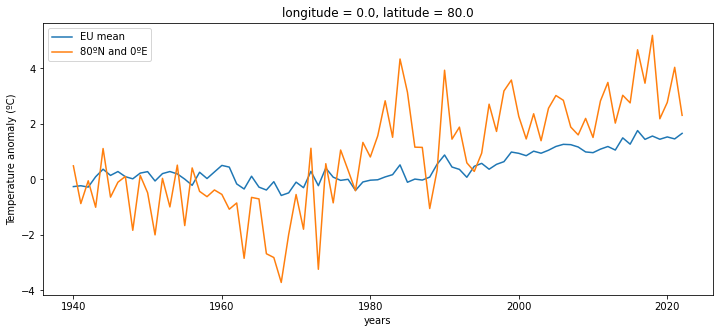

In [64]:
# Using matplotlib create your figure
plt.figure(figsize=(12,5))
# use plt.plot() to plot
t2m_yearly_anomaly.mean(dim=('latitude', 'longitude')).plot(label='EU mean')
# What about the North?
t2m_yearly_anomaly.sel(latitude=80, longitude=0).plot(label='80ºN and 0ºE')
# Add appropiate labels
plt.xlabel('years')
plt.ylabel('Temperature anomaly (ºC)')
# # Add an apprpiate title
# plt.title()
plt.legend()

### Is there really some warming?


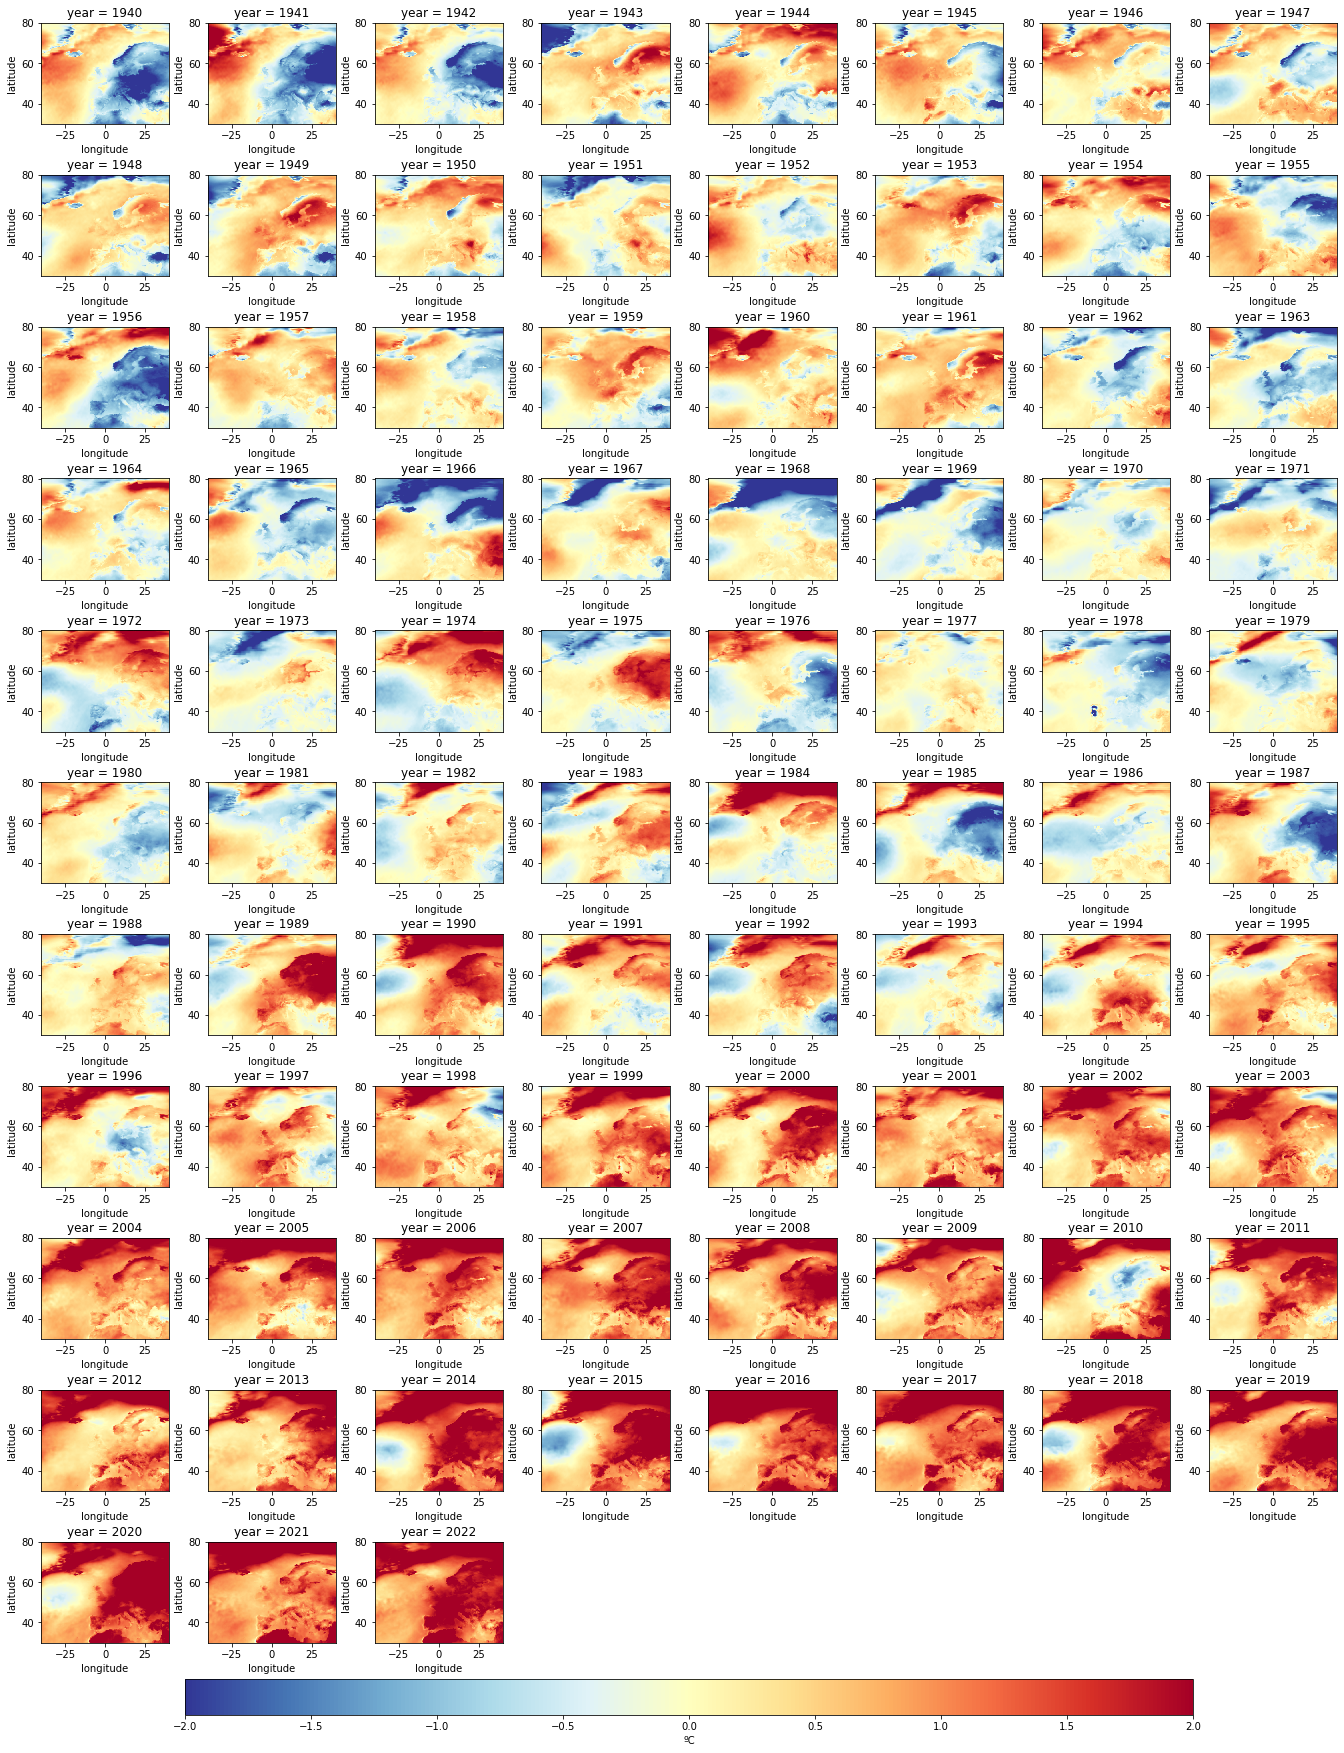

In [65]:
import matplotlib.colors as mcolors

# Determine the number of rows and columns for the subplot grid
# Adjust these values as needed to fit your display
nrows = 11  # Number of rows
ncols = 8   # Number of columns

# Set up the matplotlib figure
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 25))

# Flatten the axes array for easy indexing
axs = axs.flatten()
# Define the colormap and normalization
cmap = plt.get_cmap('RdYlBu_r')
norm = mcolors.Normalize(vmin=-2.0, vmax=2.0)

# Plot data for each year
for i, year in enumerate(t2m_yearly_anomaly.year.values):
    im = t2m_yearly_anomaly.sel(year=year).plot(ax=axs[i], 
    add_colorbar=False, cmap=cmap, norm=norm)

# Turn off any unused subplots
for i in range(len(t2m_yearly_anomaly.year), nrows * ncols):
    axs[i].axis('off')

# Improve layout and make room for colorbar
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95, hspace=0.5, wspace=0.3)
cbar_ax = fig.add_axes([0.15, 0.01, 0.7, 0.02])  # Position for horizontal colorbar

# Add horizontal colorbar
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='ºC')

# Display the plot
plt.show()


### Computing the seasonal mean climatology of precipitation over Europe


[Download](https://knmi-ecad-assets-prd.s3.amazonaws.com/ensembles/data/Grid_0.25deg_reg_ensemble/rr_ens_mean_0.25deg_reg_v28.0e.nc) the E-OBS gridded dataset of daily rainfall (RR) at 0.25ºx0.25º resolution for Europe

* Full E-OBS datasets and other variables can be found [HERE](https://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php#datafiles)


In [66]:
# Reading the file 
file_path_rr = '../data/rr_ens_mean_0.25deg_reg_v28.0e.nc'
DS_rr = xr.open_dataset(file_path_rr)
DS_rr = tools.convert_and_sort_coords(DS_rr)
# Exracting the rr variable
rr = DS_rr.rr
print(rr)

<xarray.DataArray 'rr' (time: 26844, latitude: 201, longitude: 464)>
[2503578816 values with dtype=float32]
Coordinates:
  * latitude   (latitude) float64 25.38 25.62 25.88 26.12 ... 74.88 75.12 75.38
  * longitude  (longitude) float64 -40.38 -40.12 -39.88 ... 74.88 75.12 75.38
  * time       (time) datetime64[ns] 1950-01-01 1950-01-02 ... 2023-06-30
Attributes:
    units:          mm
    long_name:      rainfall
    standard_name:  thickness_of_rainfall_amount
    cell_methods:   time: mean


Unlike temperature, precipitation cannot be directly averaged along the time/seasons dimension. Rainfall has to be first summed over each season and then averaged. We need to combine the use of the DataArray.resample() and DataArray.groupby() functions.

The [DataArray.resample()](https://docs.xarray.dev/en/latest/generated/xarray.DataArray.resample.html) function allows us to (among other functions) to aggregate our data by seasons using the "QS" argument. 'QS-Dec' indicates that the data is resample into quaterly intervals that start in December. Here's what it entails:

1. Quarterly Intervals: Your data will be divided into periods of three months each.

2. Starting in December: The first quarter starts in December. This sets the beginning of your quarters.

For 'QS-DEC', the quarters (or seasons) will be structured as follows:

* Q1: December, January, February
* Q2: March, April, May
* Q3: June, July, August
* Q4: September, October, November

In [70]:
# Selecting the 1991-03 to 2021-02 period
rr_clim = rr.sel(time=(slice('1991-03', '2021-02')))
print(rr_clim.time)

<xarray.DataArray 'time' (time: 10958)>
array(['1991-03-01T00:00:00.000000000', '1991-03-02T00:00:00.000000000',
       '1991-03-03T00:00:00.000000000', ..., '2021-02-26T00:00:00.000000000',
       '2021-02-27T00:00:00.000000000', '2021-02-28T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1991-03-01 1991-03-02 ... 2021-02-28
Attributes:
    long_name:      Time in days
    standard_name:  time
    cell_methods:   time: mean


In [71]:
# Computing the 3-monthly sum using DataArray.resample(time='QS-DEC')
rr_seasonal_sum = rr_clim.resample(time='QS-DEC').sum()
print(rr_seasonal_sum.time)

<xarray.DataArray 'time' (time: 120)>
array(['1991-03-01T00:00:00.000000000', '1991-06-01T00:00:00.000000000',
       '1991-09-01T00:00:00.000000000', '1991-12-01T00:00:00.000000000',
       '1992-03-01T00:00:00.000000000', '1992-06-01T00:00:00.000000000',
       '1992-09-01T00:00:00.000000000', '1992-12-01T00:00:00.000000000',
       '1993-03-01T00:00:00.000000000', '1993-06-01T00:00:00.000000000',
       '1993-09-01T00:00:00.000000000', '1993-12-01T00:00:00.000000000',
       '1994-03-01T00:00:00.000000000', '1994-06-01T00:00:00.000000000',
       '1994-09-01T00:00:00.000000000', '1994-12-01T00:00:00.000000000',
       '1995-03-01T00:00:00.000000000', '1995-06-01T00:00:00.000000000',
       '1995-09-01T00:00:00.000000000', '1995-12-01T00:00:00.000000000',
       '1996-03-01T00:00:00.000000000', '1996-06-01T00:00:00.000000000',
       '1996-09-01T00:00:00.000000000', '1996-12-01T00:00:00.000000000',
       '1997-03-01T00:00:00.000000000', '1997-06-01T00:00:00.000000000',
       '1997-

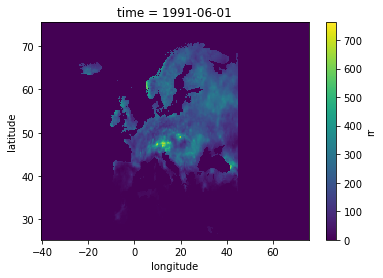

In [73]:
rr_seasonal_sum[1].plot()

In [74]:
# Computing the seasonal mean rainfall using DataArray.groupby('time.season')
rr_seasonal_mean_climatology = rr_seasonal_sum.groupby('time.season').mean()
print(rr_seasonal_mean_climatology)

<xarray.DataArray 'rr' (season: 4, latitude: 201, longitude: 464)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 

#### Practice time 💻
<div style="background-color:lightgreen; padding:10px">
    Plot the seasonal mean rainfall for the 1991 - 2020 period using a 4 panel plot
</div>

* [List of Colormaps options](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

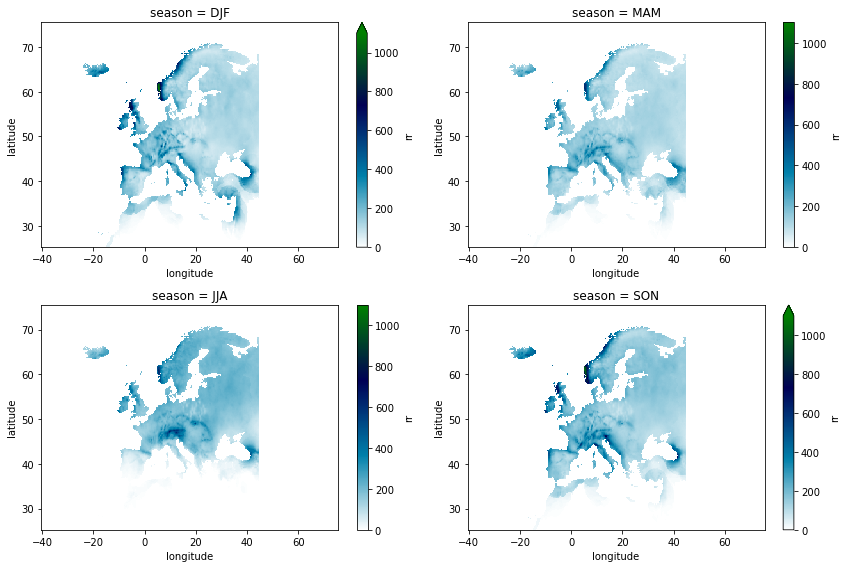

In [82]:
# you code goes here
# Set up the matplotlib figure and axes. The 'figsize' can be adjusted as needed.
figs, axs = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
cmap = 'ocean_r'
vmin=0
vmax=1100
# Winter (DJF)
rr_seasonal_mean_climatology.sel(season='DJF').plot(ax = axs[0,0], cmap=cmap, vmin=vmin, vmax=vmax)
# Spring (MAM)
rr_seasonal_mean_climatology.sel(season='MAM').plot(ax = axs[0,1], cmap=cmap, vmin=vmin, vmax=vmax)
# Summer (JJA)
rr_seasonal_mean_climatology.sel(season='JJA').plot(ax = axs[1,0], cmap=cmap, vmin=vmin, vmax=vmax)
# Autumn (SON)
rr_seasonal_mean_climatology.sel(season='SON').plot(ax= axs[1,1], cmap=cmap, vmin=vmin, vmax=vmax)
plt.tight_layout()

#### Practice time 💻
<div style="background-color:lightgreen; padding:10px">
    Compute the European yearly precipitation anomalies.
    <ul>
        <li>1. Compute the yearly climatology of total precipitation for the 1961-1990 baseline period</li>
        <li>2. Use the .resample or .groupby function to aggrate your data by year and compute the mean</li>
        <li>3. Compute the yearly anomalies of the rainfall data</li>
        <li>4. Plot a multipanel plot to showcase the European year-to-year rainfall anomalies over the whole period</li>
    </ul>
</div>

In [94]:
rr_yearly_sum = rr.groupby('time.year').sum()
# rr_yearly_sum.year

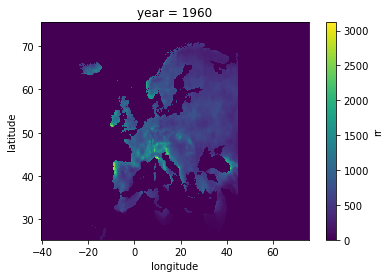

In [88]:
rr_yearly_sum[10].plot()

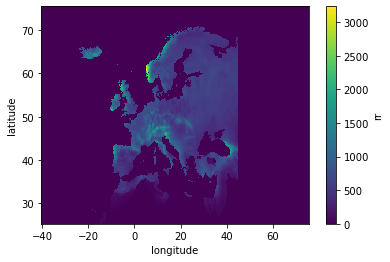

In [89]:
# Compute the mean of the climatological period 1961 - 1990
rr_climatology = rr_yearly_sum.sel(year=slice('1961', '1990')).mean(dim='year')
rr_climatology.plot()

In [90]:
# Computing the yearly anomaly of precipitation
rr_yearly_anomaly = rr_yearly_sum - rr_climatology
rr_yearly_anomaly.dims

('year', 'latitude', 'longitude')

In [92]:
rr_yearly_anomaly = rr_yearly_anomaly.sel(year=slice('1950', '2022'),
                                         latitude = slice(35, 75),
                                         longitude = slice(-10, 35))

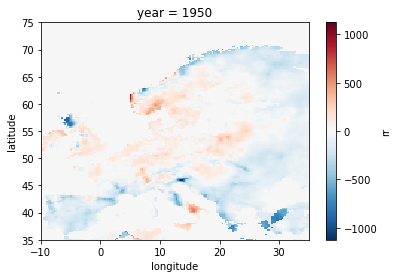

In [93]:
rr_yearly_anomaly[0].plot()

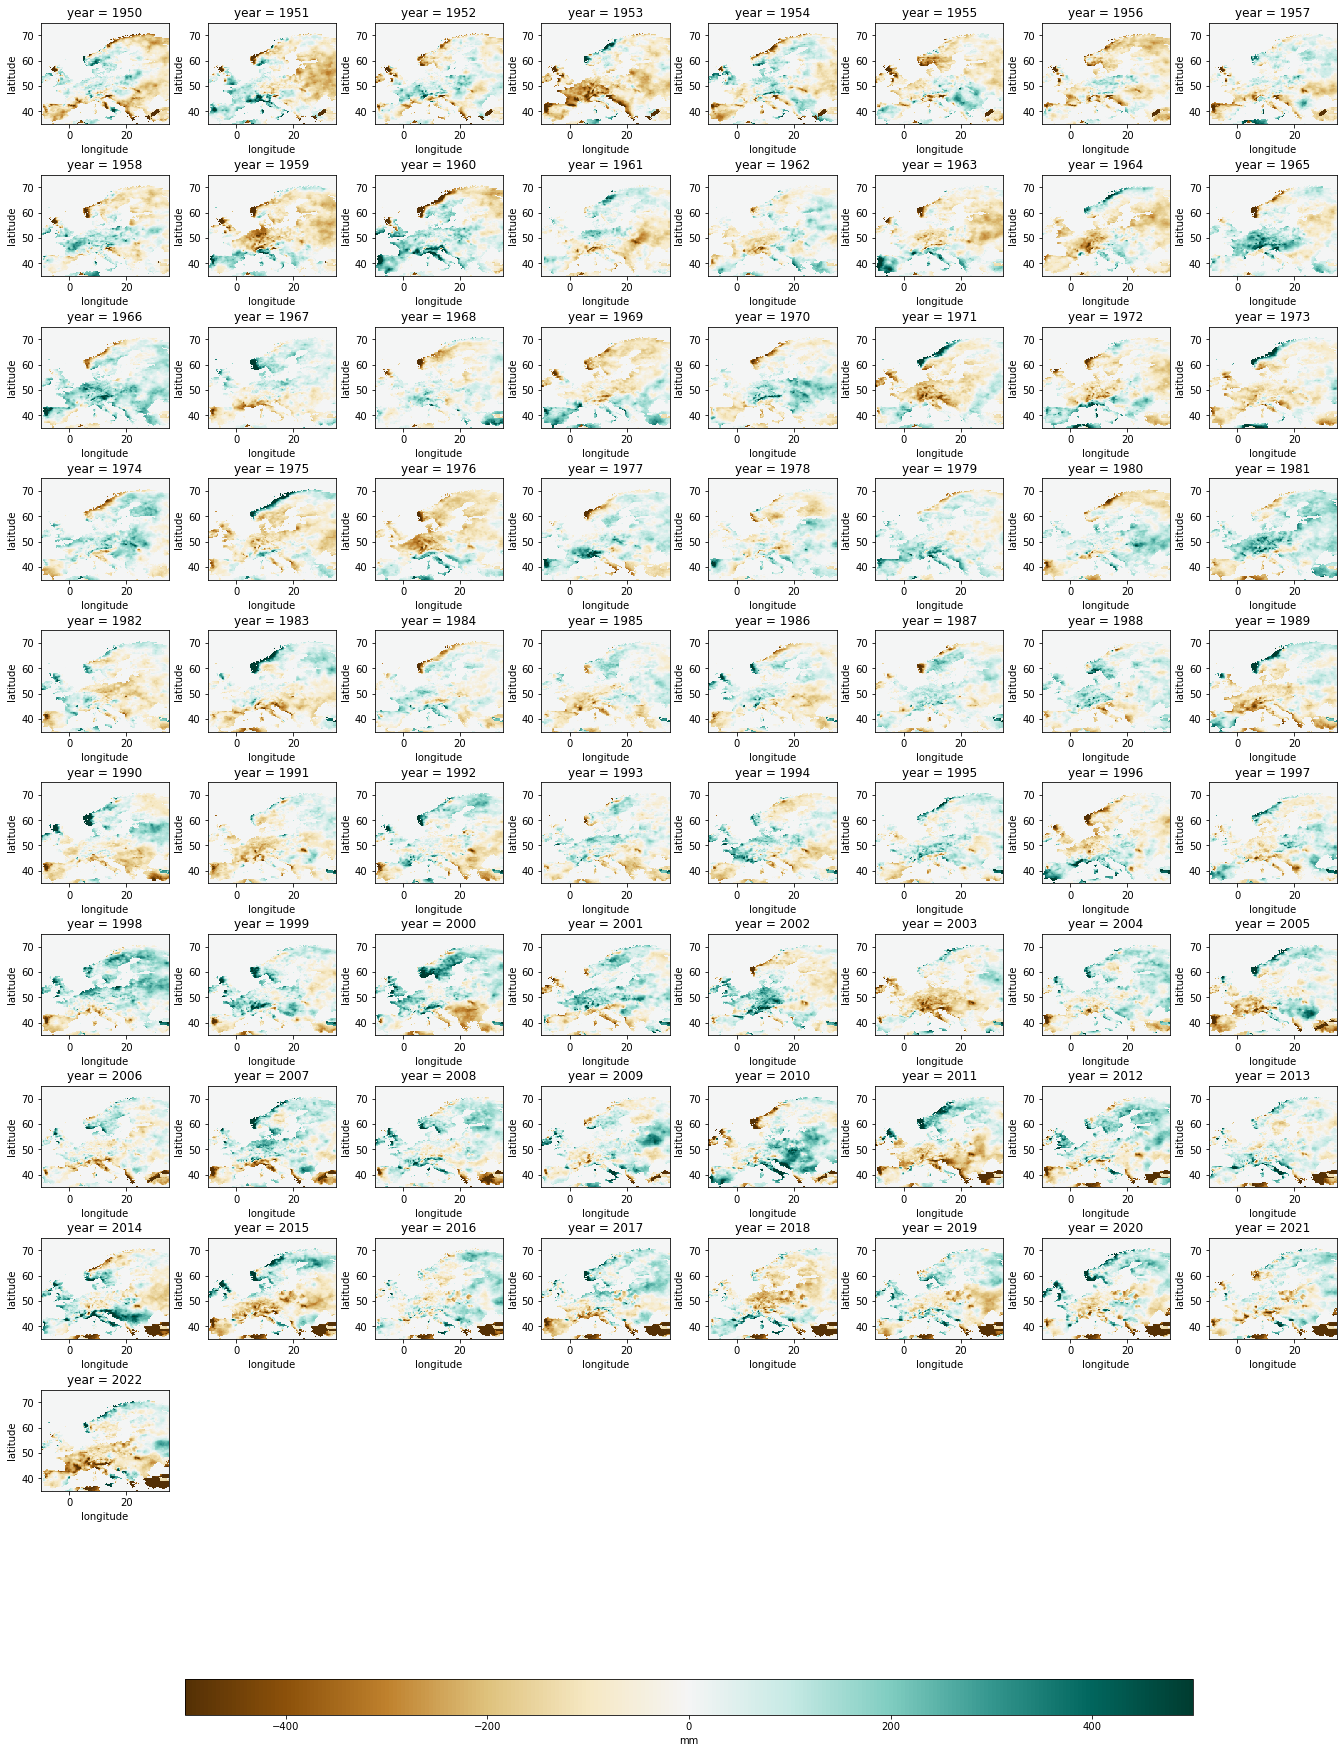

In [95]:
import matplotlib.colors as mcolors

# Determine the number of rows and columns for the subplot grid
# Adjust these values as needed to fit your display
nrows = 11  # Number of rows
ncols = 8   # Number of columns

# Set up the matplotlib figure
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 25))

# Flatten the axes array for easy indexing
axs = axs.flatten()
# Define the colormap and normalization
cmap = plt.get_cmap('BrBG')
norm = mcolors.Normalize(vmin=-500, vmax=500)

# Plot data for each year
for i, year in enumerate(rr_yearly_anomaly.year.values):
    im = rr_yearly_anomaly.sel(year=year).plot(ax=axs[i], 
    add_colorbar=False, cmap=cmap, norm=norm)

# Turn off any unused subplots
for i in range(len(rr_yearly_anomaly.year), nrows * ncols):
    axs[i].axis('off')

# Improve layout and make room for colorbar
fig.subplots_adjust(bottom=0.05, top=0.95, left=0.05, right=0.95, hspace=0.5, wspace=0.3)
cbar_ax = fig.add_axes([0.15, 0.01, 0.7, 0.02])  # Position for horizontal colorbar

# Add horizontal colorbar
fig.colorbar(im, cax=cbar_ax, orientation='horizontal', label='mm')

# Display the plot
plt.show()
